# Project: Advanced Lane Finding

## Camera calibration

In [6]:
# Load nessesery modules and set up
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

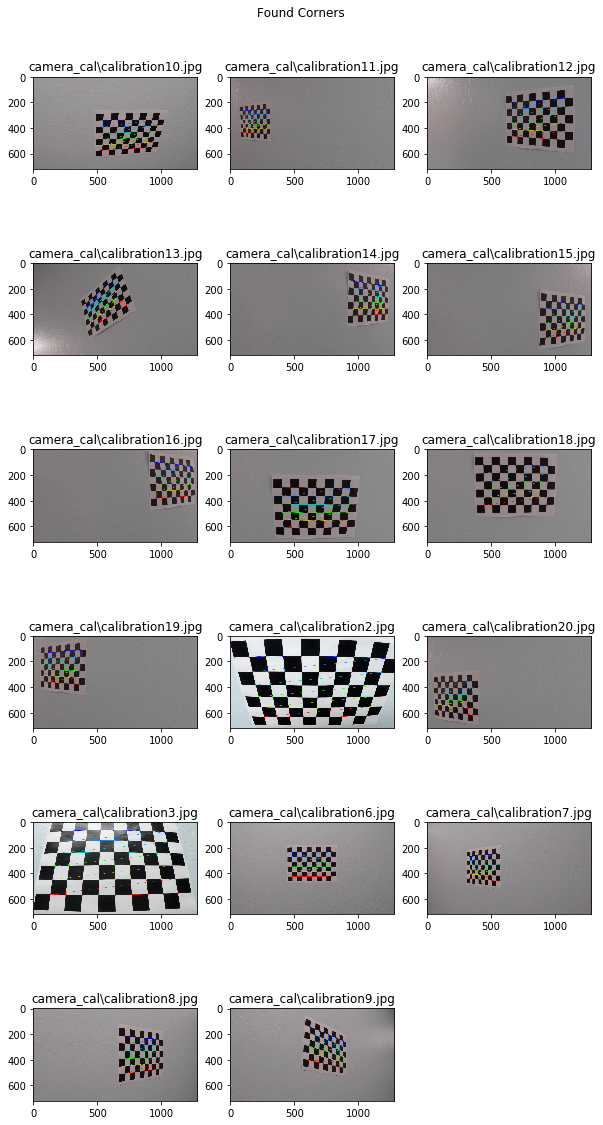

Corners were found on 17 out of 20 it is 85.0 % of calibration images


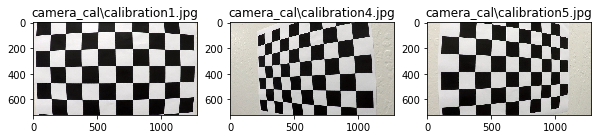

In [19]:

# how many corners in pictures
x_corners = 9 
y_corners = 6

objp = np.zeros((y_corners * x_corners,3), np.float32)
objp[:,:2] = np.mgrid[0:x_cor, 0:y_cor].T.reshape(-1,2)

objpoints = [] 
imgpoints = [] 

images = glob.glob('camera_cal/calibration*.jpg')

not_found = []

plt.figure(figsize=(10, 20))

plt.figtext(0.5,0.9,'Found Corners ', fontsize=12, ha='center')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (x_cor,y_cor), None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        plt.subplot(6, 3, len(imgpoints))
        cv2.drawChessboardCorners(img, (x_cor,y_cor), corners, ret)
        plt.imshow(img)
        plt.title(fname)
        
    else:
        not_found.append(fname)
plt.show()

print 'Corners were found on', str(len(imgpoints)), 'out of', str(len(images)), 'it is', str(len(imgpoints)*100.0/len(images)),'% of calibration images'

plt.figure(figsize=(10, 20))

#plt.figtext(.5,.9 ,'Not found corners ', fontsize=12)
for i, p in enumerate(not_found):
    plt.subplot(1, 3, i+1)
    plt.imshow(mpimg.imread(p)) 
    plt.title(p)

plt.show()
#plt.savefig("readme_img/no_corners.jpg")